In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import hsv_to_rgb
rcdef = plt.rcParams.copy()

In [1]:
def Hcomplex(z):# computes the hue corresponding to the complex number z
    H=np.angle(z)/(2*np.pi)+1
    return np.mod(H,1)

In [3]:

def func_vals(f, re, im,  N): #evaluates the complex function at the nodes of the grid
    #re and im are  tuples, re=(a,b) and im=(c,d), defining the rectangular region
    #N is the number of nodes per unit interval 

    l=re[1]-re[0]
    h=im[1]-im[0]
    resL=N*l #horizontal resolution
    resH=N*h#vertical resolution
    x=np.linspace(re[0], re[1],resL)
    y=np.linspace(im[0], im[1], resH)
    x,y=np.meshgrid(x,y)
    z=x+1j*y
    w=f(z)
    return w 

def domaincol_c(w, s):#Classical domain coloring
    #w is the complex array of values f(z)
    #s is the constant saturation
    
    
    indi=np.where(np.isinf(w))#detects the values w=a+ib, with a or b or both =infinity
    indn=np.where(np.isnan(w))#detects nans
  
    H=Hcomplex(w)
    S = s*np.ones_like(H)
    modul=np.absolute(w)
    V= (1.0-1.0/(1+modul**2))**0.2
    # the points mapped to infinity are colored with white; hsv_to_rgb(0,0,1)=(1,1,1)=white
    H[indi]=0.0 
    S[indi]=0.0  
    V[indi]=1.0
    #hsv_to_rgb(0,0,0.5)=(0.5,0.5, 0.5)=gray  
    H[indn]=0
    S[indn]=0
    V[indn]=0.5
    HSV = np.dstack((H,S,V))
    RGB = hsv_to_rgb(HSV)
    return RGB 

def plot_domain(color_func, f,   re=[-1,1], im= [-1,1], Title='',
                s=0.9, N=200, daxis=None):
    w=func_vals(f, re, im, N)
    domc=color_func(w, s)
    plt.xlabel("$\Re(z)$")
    plt.ylabel("$\Im(z)$")
    plt.title(Title)
    if(daxis):
         plt.imshow(domc, origin="lower", extent=[re[0], re[1], im[0], im[1]])
       
    else:
        plt.imshow(domc, origin="lower")
        plt.axis('off')

In [5]:
def domaincol_m(w,  s): #domain coloring with modulus track

    # w the array of values
    #s is the constant Saturation

    H=Hcomplex(w) 
    modulus=np.absolute(w)
    c= np.log(2)
    Logm=np.log(modulus)/c #log base 2
    Logm=np.nan_to_num(Logm)
    Logm = modulus

    V=Logm-np.floor(Logm)
    S = s*np.ones_like(H, float)

    HSV = np.dstack((H,S,V**0.2))# V**0.2>V for V in[0,1];this choice  avoids too dark colors
    RGB=hsv_to_rgb(HSV) 
    return RGB

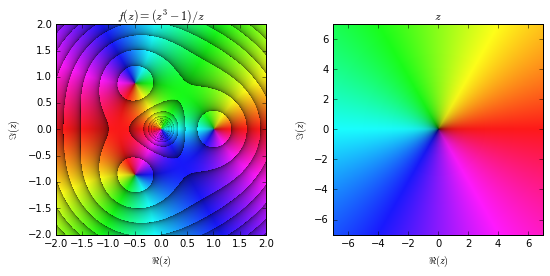

In [7]:
plt.rcParams['figure.figsize'] = 8, 5
plt.subplot(1,2,1)
f=lambda z: (z**3-1)/z

plot_domain(domaincol_m, f, re=[-2,2], im=[-2,2], Title='$f(z)=(z^3-1)/z$', daxis=True)
plt.subplot(1,2,2)
plot_domain(domaincol_c, lambda z:z, re=[-7, 7], im=[-7, 7], Title='$z$', daxis=True)
plt.tight_layout(2)  


/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:10: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  # This is added back by InteractiveShellApp.init_path()


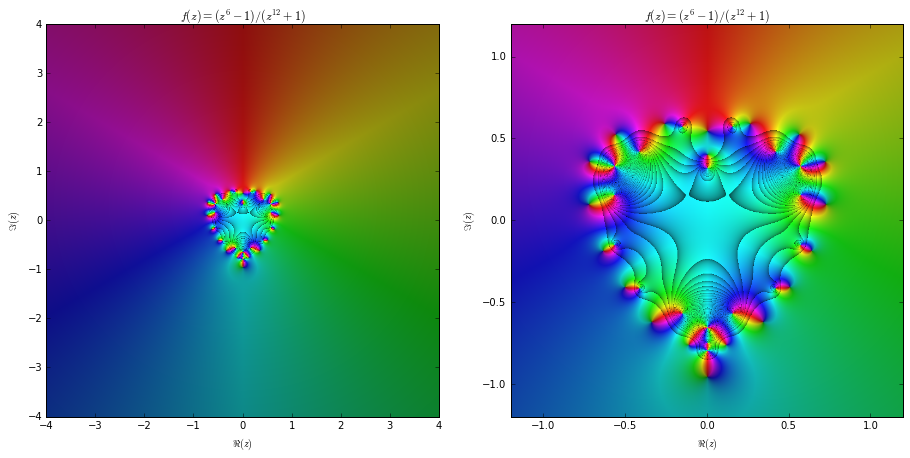

In [62]:
plt.rcParams['figure.figsize'] = 13, 7

plt.subplot(1,2,1)
ab=(-4,4)
cd=(-4,4)
f=lambda z: (z**3-2)/(z**12+0.4)/(z**3+1.1)**2 +0.3/(z-0.5)+0.01/(z+1.25)**2
g = lambda z: -z*np.pi/2*1j
compose=lambda f,g : lambda z: f(g(z))

plot_domain(domaincol_m,  compose(f,g),   re=ab, im=cd, Title='$f(z)=(z^6-1)/(z^{12}+1)$', N=300, daxis=True)
plt.subplot(1,2,2)
s = 1.2
ab=(-s,s)
cd=ab
plot_domain(domaincol_m,  compose(f,g),   re=ab, im=cd, Title='$f(z)=(z^6-1)/(z^{12}+1)$', N=300, daxis=True)
plt.tight_layout(2)

NameError: name 'anp' is not defined

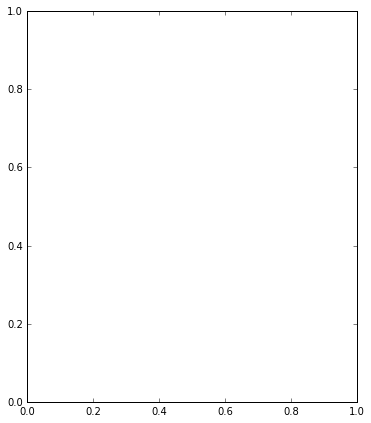

In [67]:

plt.rcParams['figure.figsize'] = 13, 7

plt.subplot(1,2,1)
ab=(-4,4)
cd=(-4,4)
f=lambda z: -1/s*np.sqrt(2/3/np.pi)*np.exp(1j*np.imag(z))*np.sin(np.real(z))
g = lambda z: z
compose=lambda f,g : lambda z: f(g(z))

plot_domain(domaincol_m,  compose(f,g),   re=ab, im=cd, Title='$f(z)=(z^6-1)/(z^{12}+1)$', N=300, daxis=True)
plt.subplot(1,2,2)
s = 1.2
ab=(-s,s)
cd=ab
plot_domain(domaincol_m,  compose(f,g),   re=ab, im=cd, Title='$f(z)=(z^6-1)/(z^{12}+1)$', N=300, daxis=True)
plt.tight_layout(2)